# <center>Laboratorium Całki<br>Metody Numeryczne</center>

In [35]:
import numpy as np
from scipy.integrate import trapz,quad,quadrature
import matplotlib
import matplotlib.pyplot as plt
%reload_ext memory_profiler
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


# Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z metodami całkowania numerycznego funkcji:  
$$
\int\limits_{a}^{b}f(x)dx 
$$  

Dana jest funkcja $f(x)$, należy wyznaczyć wartość całki tej funkcji na przedziale $a$,$b$.


***Zadanie 1.***    
Wyznacz numerycznie wartość całki:   
$$
\int\limits_{a}^{b}\sin^2(\cfrac{1}{x-1.01})dx 
$$

Wykonaj następujące czynności:

1. Czy możliwe jest całkowanie podanej funkcji na dowolnym przedziale? Swoją odpowiedź uzasadnij.
2. Oblicz całkę numerycznie na przedziale $a =0$, $b=1$ przy pomocy następujących metod:  
    1. Metoda Prostokątów
    2. Metoda Trapezów - [trapezoid](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapezoid.html#scipy.integrate.trapezoid)
    3. Metoda Kwadratur - [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad)  
  
Sprawdź jak wyniki róźnią się od siebie, czy ma na nie wpływ długość wektora $\mathbf{y}$ oraz wartość parametru $dx$

3. Porównaj wyniki i czas obliczeń z punktu 1 z funkcjami:
    1. [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad)
    2. [quadrature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quadrature.html#scipy.integrate.quadrature)

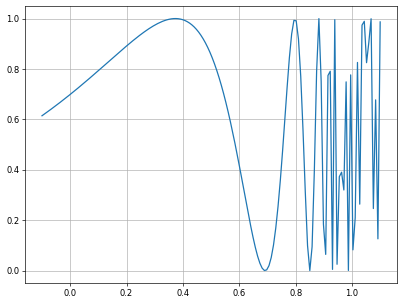

In [36]:
fun = lambda x : (np.sin(1/(x - 1.01)))**2
x = np.linspace(-0.1,1.1,150)
plt.figure(figsize=(8, 6), dpi=60)
plt.plot(x,fun(x))
plt.grid()
plt.show()

Funkcja jest całkowalna na zadanym przedziele ponieważ jest na nim ciągła i nie ucieka do nieskończoności.

Wynik z wolframalpha
$$
\int\limits_{0}^{1}\sin^2(\cfrac{1}{x-1.01})dx = 0.675514
$$


In [37]:
def rectangle(a, b, fun, dx = 0.0001):
    result = 0
    while(a<=b):
        result += fun(a)*dx
        a += dx
    return result

METODA PROSTOKĄTÓWÓW

In [38]:
a = 0
b = 1
rec = rectangle(a,b,fun)
print(rec)

0.6755541002159497


METODA TRAPEZÓW

In [39]:

x = np.linspace(a,b,10000)
y = fun(x)
trap = trapz(y,x)
print(trap)

0.6755063267072553


METODA KWADRATUR

In [40]:

qua = quad(fun,a,b)
print(qua[0])

0.6755141541635237


C:\Users\Michał\AppData\Local\Temp\ipykernel_3796\1421874211.py:14: IntegrationWarning: The maximum number of subdivisions (10) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  qua.append(quad(fun,a,b,limit=i)[0])


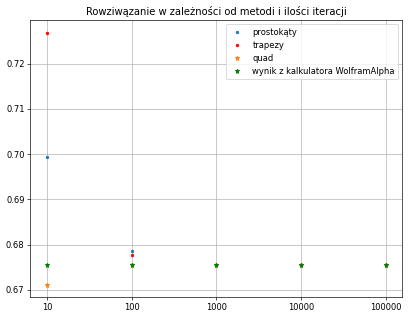

In [41]:
dx = [10**(-x) for x in range(1,6)]
lst = [10**(x) for x in range(1,6)]

rec = []
trap = []
qua = []
result = [0.675514] * len(dx)
for i in dx:
    rec.append(rectangle(a,b,fun,dx=i))
for i in lst:
    x = np.linspace(a,b,i)
    y = fun(x)
    trap.append(trapz(y,x))
    qua.append(quad(fun,a,b,limit=i)[0])

plt.figure(figsize=(8, 6), dpi=60)
plt.plot(['10', '100', '1000', '10000', '100000'],rec,'.')
plt.plot(trap,'r.')
plt.plot(qua,'*')
plt.plot(result,'g*')
plt.title("Rowziwązanie w zależności od metodi i ilości iteracji")
plt.legend(['prostokąty','trapezy','quad','wynik z kalkulatora WolframAlpha'])
plt.grid()
plt.show()

Jak widać na załączonym wykresie dx może mieć znaczenie w otrzymanym wyniku. Im krok jest mniejszy tym dokłedniejszy wynik otrzymamy.

In [46]:
lst = [10**(x) for x in range(1,6)]
time_quad = []
time_quadrature = []
quadtaure_result = []
for i in lst:
    time_m = %timeit -r 5 -n 10 -o quad(fun,a,b,limit=i)
    time_quad.append(time_m.average)
    quadtaure_result.append(quadrature(fun,a,b)[0])
    time_q =  %timeit -r 5 -n 10 -o quadrature(fun,a,b)
    time_quadrature.append(time_q.average)



<magic-timeit>:1: IntegrationWarning: The maximum number of subdivisions (10) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\Users\Michał\AppData\Roaming\Python\Python310\site-packages\scipy\integrate\_quadrature.py:276: AccuracyWarning: maxiter (50) exceeded. Latest difference = 9.037836e-03
  warnings.warn(


525 µs ± 120 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
964 µs ± 73.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
729 µs ± 9.48 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
878 µs ± 15.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
705 µs ± 9.77 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
869 µs ± 6.48 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
707 µs ± 11 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
1.24 ms ± 358 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
751 µs ± 21.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
888 µs ± 8.24 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


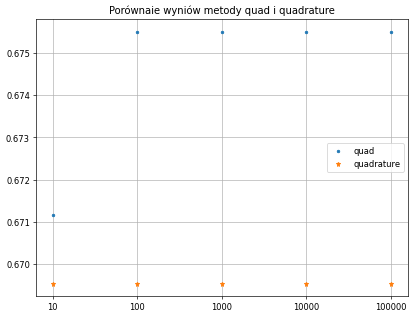

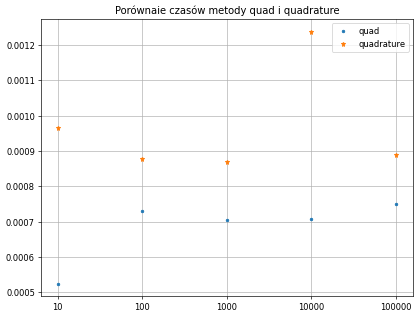

In [56]:
plt.figure(figsize=(8, 6), dpi=60)
plt.plot(['10', '100', '1000', '10000', '100000'],qua,'.')
plt.plot(quadtaure_result,'*')
plt.title('Porównaie wyniów metody quad i quadrature')
plt.legend(['quad','quadrature'],loc=7)
plt.grid()
plt.show()

plt.figure(figsize=(8, 6), dpi=60)
plt.plot(['10', '100', '1000', '10000', '100000'],time_quad,'.')
plt.plot(time_quadrature,'*')
plt.title('Porównaie czasów metody quad i quadrature')
plt.legend(['quad','quadrature'],loc=1)
plt.grid()
plt.show()

Jak widać różnica w wyniku metody quad i quadrature wynosi około 0.005 czy stosunkowo mało. Jeśli chodzi o czas to szybsza okazuje się metoda quad.

***Zadanie 2.***
Dla funkcji 

$$f(x) = e^{-x^2}$$

wyznacz numerycznie wartośc całki na przedziale $a = 0$, $b=1$  w  taki sam sposób jak w zadaniu 1.

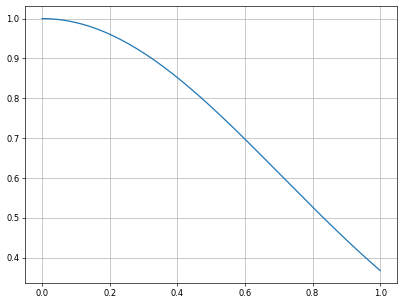

In [59]:
fun = lambda x : np.exp(-x*x)
x = np.linspace(0,1,150)
plt.figure(figsize=(8, 6), dpi=60)
plt.plot(x,fun(x))
plt.grid()
plt.show()

Funkcja jest całkowalna za zadanym przedziale, ponieważ jest na nim ciągła i nie ucieka do nieskończoności.

METODA PROSTKĄTÓW

In [61]:
a = 0
b = 1
result = rectangle(a,b,fun)
print(result)

0.7468925261713815


METODA TRAPEZÓW

In [62]:
x = np.linspace(a,b,10000)
y = fun(x)
trap = trapz(y,x)
print(trap)

0.746824132199172


METODA KWADRATUR

In [63]:
qua = quad(fun,a,b)
print(qua[0])

0.7468241328124271


Wynik z wolframalpha
$$
\int\limits_{0}^{1}e^{-x^2}dx = 0.746824
$$

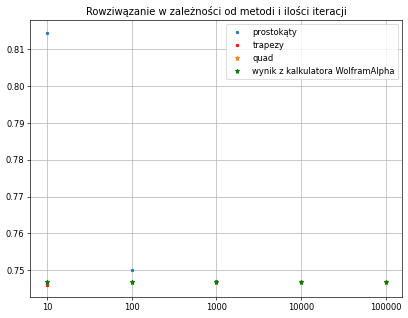

In [64]:
dx = [10**(-x) for x in range(1,6)]
lst = [10**(x) for x in range(1,6)]

rec = []
trap = []
qua = []
result = [0.746824] * len(dx)
for i in dx:
    rec.append(rectangle(a,b,fun,dx=i))
for i in lst:
    x = np.linspace(a,b,i)
    y = fun(x)
    trap.append(trapz(y,x))
    qua.append(quad(fun,a,b,limit=i)[0])

plt.figure(figsize=(8, 6), dpi=60)
plt.plot(['10', '100', '1000', '10000', '100000'],rec,'.')
plt.plot(trap,'r.')
plt.plot(qua,'*')
plt.plot(result,'g*')
plt.title("Rowziwązanie w zależności od metodi i ilości iteracji")
plt.legend(['prostokąty','trapezy','quad','wynik z kalkulatora WolframAlpha'])
plt.grid()
plt.show()

Na tym wykresie dobrze widać, że metoda prostokątów dla małych większych wartości kroku trochę odstaje od metod wbudowanych.

In [88]:
lst = [10**(x) for x in range(1,6)]
time_quad = []
time_quadrature = []
quadtaure_result = []
for i in lst:
    time_m = %timeit -r 5 -n 10 -o quad(fun,a,b,limit=i)
    time_quad.append(time_m.average)
    quadtaure_result.append(quadrature(fun,a,b)[0])
    time_q =  %timeit -r 5 -n 10 -o quadrature(fun,a,b)
    time_quadrature.append(time_q.average)

5.91 µs ± 684 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
85.9 µs ± 2.41 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
5.73 µs ± 393 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
83.7 µs ± 1.62 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
6.08 µs ± 455 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
82.9 µs ± 1.52 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
7.14 µs ± 907 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
89.1 µs ± 6.82 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
7.58 µs ± 1.67 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
83 µs ± 1.59 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


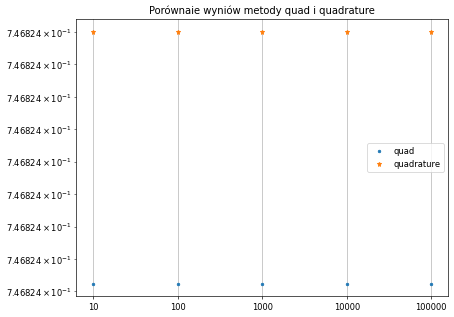

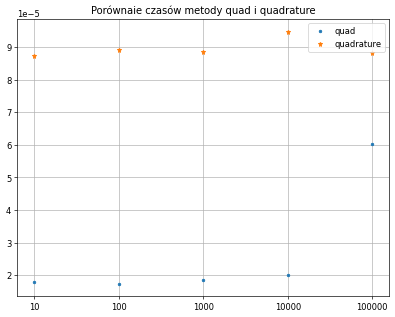

In [68]:
plt.figure(figsize=(8, 6), dpi=60)
plt.plot(['10', '100', '1000', '10000', '100000'],qua,'.')
plt.plot(quadtaure_result,'*')
plt.title('Porównaie wyniów metody quad i quadrature')
plt.legend(['quad','quadrature'],loc=7)
plt.semilogy()
plt.grid()
plt.show()

plt.figure(figsize=(8, 6), dpi=60)
plt.plot(['10', '100', '1000', '10000', '100000'],time_quad,'.')
plt.plot(time_quadrature,'*')
plt.title('Porównaie czasów metody quad i quadrature')
plt.legend(['quad','quadrature'],loc=1)
plt.grid()
plt.show()

***Zadanie 3.***  
Dla funkcji 

$$f(x) = x^{x}$$

wyznacz numerycznie wartośc całki na przedziale $a = 1$, $b=2$  w  taki sam sposób jak w zadaniu 1.

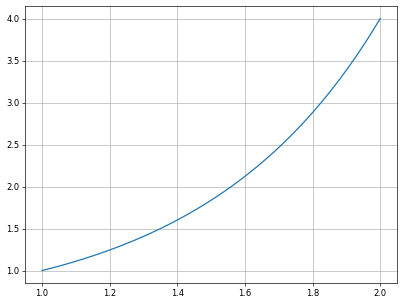

In [72]:
fun = lambda x : x**x
x = np.linspace(1,2,150)
plt.figure(figsize=(8, 6), dpi=60)
plt.plot(x,fun(x))
plt.grid()
plt.show()

Funkcja jest całkowalna na zadanym przedziele ponieważ jest na nim ciągła i nie ucieka do nieskończoności.

METODA PROSTOKĄTÓW

In [73]:
a = 1
b = 2
rec = rectangle(a,b,fun)
print(rec)

2.0506962393450023


METODA TRAPEZÓW

In [74]:
x = np.linspace(a,b,10000)
y = fun(x)
trap = trapz(y,x)
print(trap)

2.050446239346184


METODA KRADRATUR

In [75]:
qua = quad(fun,a,b)
print(qua[0])

2.050446234534731


Wynik z wolframalpha
$$
\int\limits_{1}^{2}x^{x}dx = 2.05044623
$$

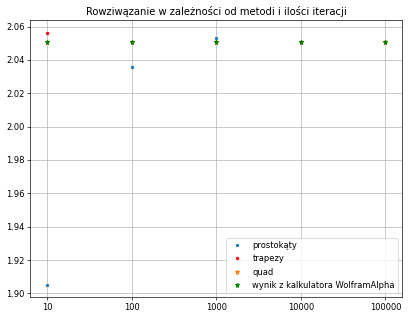

In [87]:
dx = [10**(-x) for x in range(1,6)]
lst = [10**(x) for x in range(1,6)]

rec = []
trap = []
qua = []
result = [2.05044623] * len(dx)
for i in dx:
    rec.append(rectangle(a,b,fun,dx=i))
for i in lst:
    x = np.linspace(a,b,i)
    y = fun(x)
    trap.append(trapz(y,x))
    qua.append(quad(fun,a,b,limit=i)[0])

plt.figure(figsize=(8, 6), dpi=60)
plt.plot(['10', '100', '1000', '10000', '100000'],rec,'.')
plt.plot(trap,'r.')
plt.plot(qua,'*')
plt.plot(result,'g*')
plt.title("Rowziwązanie w zależności od metodi i ilości iteracji")
plt.legend(['prostokąty','trapezy','quad','wynik z kalkulatora WolframAlpha'])
plt.grid()
plt.show()

In [89]:
lst = [10**(x) for x in range(1,6)]
time_quad = []
time_quadrature = []
quadtaure_result = []
for i in lst:
    time_m = %timeit -r 5 -n 10 -o quad(fun,a,b,limit=i)
    time_quad.append(time_m.average)
    quadtaure_result.append(quadrature(fun,a,b)[0])
    time_q =  %timeit -r 5 -n 10 -o quadrature(fun,a,b)
    time_quadrature.append(time_q.average)

6.06 µs ± 648 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
84.4 µs ± 1.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
5.94 µs ± 425 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
91.7 µs ± 15.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
6.42 µs ± 692 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
86.5 µs ± 1.28 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
7.3 µs ± 897 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
84.1 µs ± 1.35 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
7.27 µs ± 569 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
86.8 µs ± 5.99 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


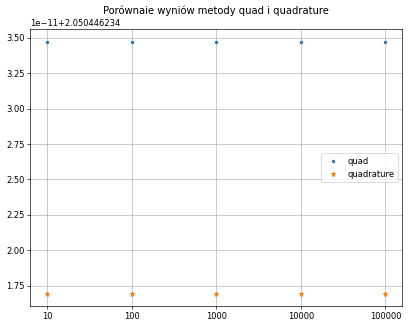

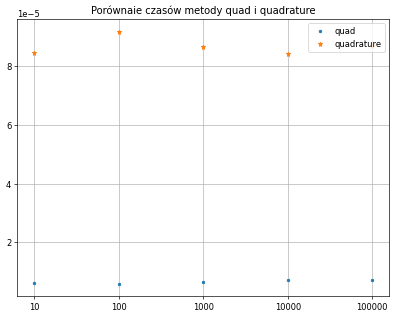

In [92]:
plt.figure(figsize=(8, 6), dpi=60)
plt.plot(['10', '100', '1000', '10000', '100000'],qua,'.')
plt.plot(quadtaure_result,'*')
plt.title('Porównaie wyniów metody quad i quadrature')
plt.legend(['quad','quadrature'],loc=7)
plt.grid()
plt.show()

plt.figure(figsize=(8, 6), dpi=60)
plt.plot(['10', '100', '1000', '10000', '100000'],time_quad,'.')
plt.plot(time_quadrature,'*')
plt.title('Porównaie czasów metody quad i quadrature')
plt.legend(['quad','quadrature'],loc=1)
plt.grid()
plt.show()

WNIOSKI:

Na dzisiejszych laboratoriach omawialiśmy temat całkowania numerycznego. Poznaliśmy takie metody jak metoda prostokątów, trapezów i kwadratur. Naszym zadaniem było sprawdzić czy zadane funckcje są całkowalne na zadanym przedziale. Następnie mieliśmy porówanć wyniki na podstawie ilości iteracji(kroku całkowania). Jak się okazało wszystkie metody działają podobnuie dla odpowienio małego kroku. Jedynie metoda prostokątów dla większych kroków trochę odstaje i zwraca wynik o około 0.1 różny od prawdziwego. Na koniec mieliśmy porównać metody quad i quadratic między sobą i zbadać czas ich wykonania.